# Stats 131 Project Report: Movies (Python n' Chill)
# Joy Harjanto, Jennifer Thorburn, Jordan Uyeki, Kristee Song

## Background Information

We analyzed the movies dataset from kaggle, which can be found here: https://www.kaggle.com/rounakbanik/the-movies-dataset. 

We also utilized the credits csv, which contains information on the cast and crew for each movie in the metadata csv.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
movies = pd.read_csv("movies_metadata.csv")
movies.head()

/Users/jordan_uyeki/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
movies.shape

(45466, 24)

Our movies dataset contains data for 45466 movies. The data contains 24 features, which are listed below.

In [5]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
movies.describe() 

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


This dataset contains 0's in place of NAs.

## Exploratory Analysis

In [7]:
movies.corr()

,revenue,runtime,vote_average,vote_count
revenue,1.000000,0.103917,0.083868,0.812022
runtime,0.103917,1.000000,0.158146,0.113539
vote_average,0.083868,0.158146,1.000000,0.123607
vote_count,0.812022,0.113539,0.123607,1.000000


There appears to be a strong correlation between revenue and vote count.

We wanted to analyze movie trends over time, so we added a column for the year the movie was released.

In [8]:
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
movies['year'] = pd.to_numeric(movies['year'],errors='coerce')
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0


Text(0.5,1,'Average Movie Revenue For Each Year in the Dataset')

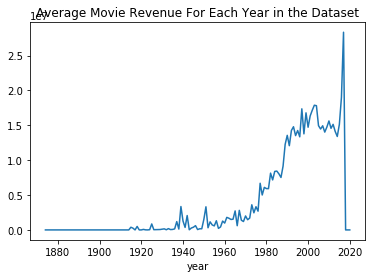

In [9]:
movies.groupby('year').mean().revenue.plot()
plt.title('Average Movie Revenue For Each Year in the Dataset')

Average revenue appears to have increased generally over time, as expected.

Text(0.5,1,'Average Movie Runtime For Each Year in the Dataset')

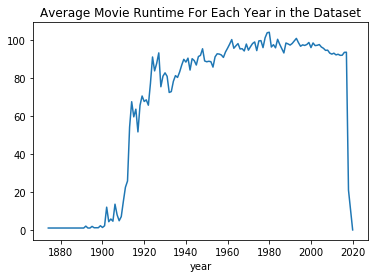

In [10]:
movies.groupby('year').mean().runtime.plot()
plt.title('Average Movie Runtime For Each Year in the Dataset')

Average runtime seems to have spiked around 1910, but since then it has stayed fairly consistent.

Text(0.5,1,'Average Movie Vote Count For Each Year in the Dataset')

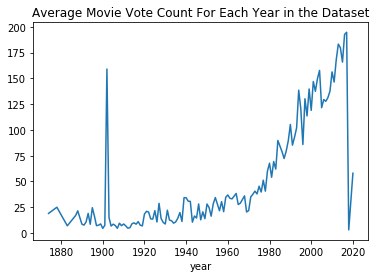

In [11]:
movies.groupby('year').mean().vote_count.plot()
plt.title('Average Movie Vote Count For Each Year in the Dataset')

Average vote count seems to have generally increased over the years.

Text(0.5,1,'Average Movie Vote Average For Each Year in the Dataset')

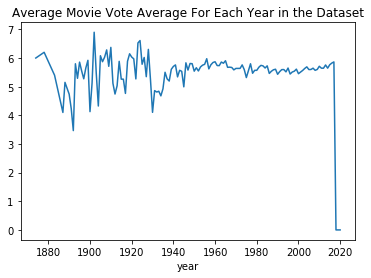

In [12]:
movies.groupby('year').mean().vote_average.plot()
plt.title('Average Movie Vote Average For Each Year in the Dataset')

Vote average seems to have stayed fairly consistent over the years, but the variance greatly diminished starting in about 1950.

Text(0.5,1,'Average Movie Budget For Each Year in the Dataset')

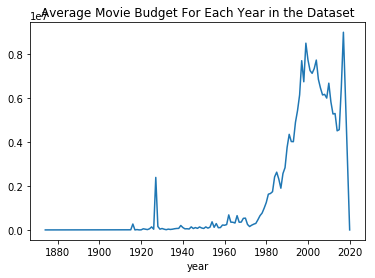

In [13]:
movies['budget'] = pd.to_numeric(movies['budget'],errors='coerce')
movies.groupby('year').mean().budget.plot()
plt.title('Average Movie Budget For Each Year in the Dataset')

Average budget seems to have generally increased until around the mid 1990s, but then it seems to have decreased in recent years.

### Research Question 1: For top grossing actors, which of their movies brought in the most revenue?

To start our analysis on what makes a movie successful, we hypothesized that the success of a movie might be impacted by whether or not the movie features a famous star.  We chose to analyze the success of movies that starred some of today’s top grossing actors and actresses.  We were curious about what exactly made these movie stars so successful.  Was it because they got casted in a handful of very successful films or did they showcase a more consistent track record of success throughout their acting career?  For each of the top grossing actors and actresses, we looked the success, quantified by revenue, for each of the movies that he or she was featured in. 

#### Top 10 Grossing Actresses of all Time

We used the IMDb’s (The Internet Movie Database) “Top 10 Highest Grossing Actresses of All Time” list, which was compiled back in June 2016 based on each actresses total gross.  The list can be found here: https://www.imdb.com/list/ls063722912/. Using the credits.csv dataset from Kaggle, we were able to pull out the movies that featured the movie stars of interest.  

In [14]:
credits = pd.read_csv("credits.csv")
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


##### #1 Scarlett Johansson

According to IMDb, Scarlett Johansson is the number one most grossing actress of all time, with a total gross of $3,332.1 in millions.

9023258869.0


34

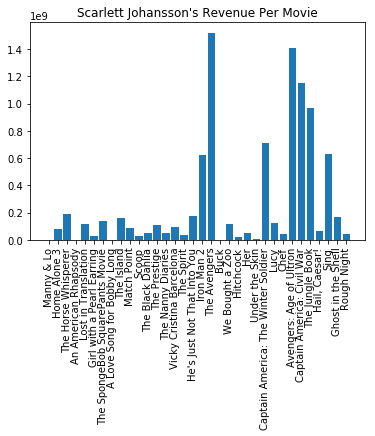

In [15]:
# Revenue Per Movie For Scarlett Johansson (#1)
credits['scarlett'] = ["Scarlett Johansson" in credits['cast'][i] for i in range(0, len(credits))]
scarlett = credits.loc[credits.scarlett == True]
scarlett.shape
scarlett_id = scarlett.id.tolist()
scarlett_id = [str(i) for i in scarlett_id]
movies_scarlett = movies[movies['id'].isin(scarlett_id)]
movies_scarlett = movies_scarlett.loc[movies_scarlett['revenue'] != 0]
plt.bar(movies_scarlett.title, movies_scarlett.revenue)
plt.title('Scarlett Johansson\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_scarlett.revenue.sum())
movies_scarlett.shape[0]

Throughout her acting career, Scarlett Johansson has been featured in 34 of the movies included in the Kaggle Movies dataset.  Some of her most successful movies, include The Avengers, The Avengers: Age of Ultron, Captain America: Civil War, Captain America: The Winter Soldier, and Iron Man 2, all of which are part of the Marvel Cinematic Universe Franchise.  

##### #2 Cameron Diaz

According to IMDb, Cameron Diaz is the second most grossing actress of all time, with a total gross of $3,031.7 in millions.

7376727285.0


35

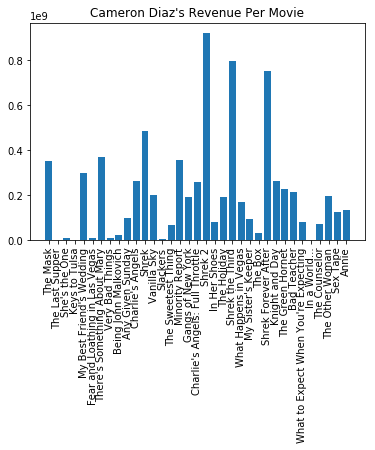

In [17]:
# Revenue Per Movie For Cameron Diaz
credits['cameron'] = ["Cameron Diaz" in credits['cast'][i] for i in range(0, len(credits))]
cameron = credits.loc[credits.cameron == True]
cameron.shape
cameron_id = cameron.id.tolist()
cameron_id = [str(i) for i in cameron_id]
movies_cameron = movies[movies['id'].isin(cameron_id)]
movies_cameron = movies_cameron.loc[movies_cameron['revenue'] != 0]
plt.bar(movies_cameron.title, movies_cameron.revenue)
plt.title('Cameron Diaz\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_cameron.revenue.sum())
movies_cameron.shape[0]

Throughout her acting career, Cameron Diaz has been featured in 35 of the movies included in the Kaggle Movies dataset.  Some of her most successful movies, include Shrek, Shrek 2, Shrek the Third, and Shrek Forever After, all of which are part of the Shrek franchise from Dreamworks Animation. 

##### #3 Helena Bonham Carter

According to IMDb, Helena Bonham Carter is the third most grossing actress of all time, with a total gross of $2,819.6 in millions.


9336750507.0


29

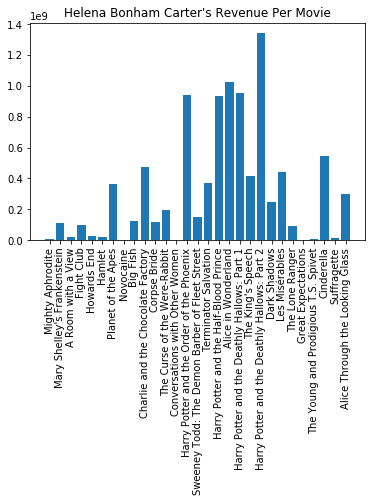

In [18]:
# Revenue Per Movie For Helena Bonham Carter
credits['helena'] = ["Helena Bonham Carter" in credits['cast'][i] for i in range(0, len(credits))]
helena = credits.loc[credits.helena == True]
helena.shape
helena_id = helena.id.tolist()
helena_id = [str(i) for i in helena_id]
movies_helena = movies[movies['id'].isin(helena_id)]
movies_helena = movies_helena.loc[movies_helena['revenue'] != 0]
plt.bar(movies_helena.title, movies_helena.revenue)
plt.title('Helena Bonham Carter\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_helena.revenue.sum())
movies_helena.shape[0]

Throughout her acting career, Helena Bonham Carter has been featured in 29 of the movies included in the Kaggle Movies dataset.  Some of her most successful movies, include Harry Potter and the Deathly Hallows: Part 2, Harry Potter and the Deathly Hallows: Part 1,  Harry Potter and the Half Blood Prince, and Harry Potter and the Order of the Phoenix, all of which are part of the Harry Potter franchise from Warner Bros. 

##### #4 Cate Blanchett

According to IMDb, Cate Blanchett is the fourth most grossing actress of all time, with a total gross of $2,802.6 in millions.

9790887836.0


35

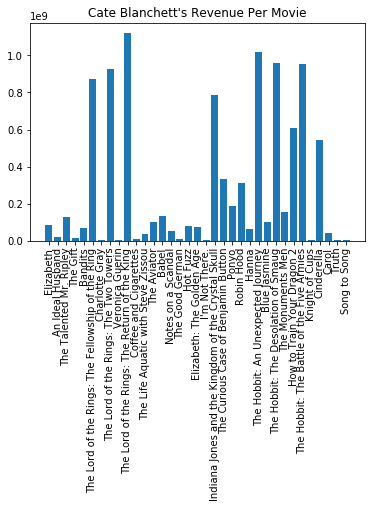

In [20]:
# Revenue Per Movie For Cate Blanchett
credits['cate'] = ["Cate Blanchett" in credits['cast'][i] for i in range(0, len(credits))]
cate = credits.loc[credits.cate == True]
cate.shape
cate_id = cate.id.tolist()
cate_id = [str(i) for i in cate_id]
movies_cate = movies[movies['id'].isin(cate_id)]
movies_cate = movies_cate.loc[movies_cate['revenue'] != 0]
plt.bar(movies_cate.title, movies_cate.revenue)
plt.title('Cate Blanchett\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_cate.revenue.sum())
movies_cate.shape[0]

Throughout her acting career, Helena Bonham Carter has been featured in 35 of the movies included in the Kaggle Movies dataset.  Some of her most successful movies, include The Lord of the Rings: The Return of the King, The Hobbit: An Unexpected Journey, The Hobbit: The Desolation of Smaug, The Lord of the Rings: The Two Towers, and The Lord of the Rings: The Fellowship of the Rings, all of which are part of the Lord of the Rings franchise from Warner Bros.

##### #5 Julia Roberts

According to IMDb, Julia Roberts is the fifth most grossing actress of all time, with a total gross of $2,734.9 in millions.

5444246010.0


39

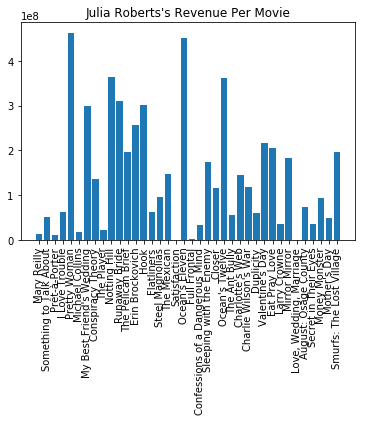

In [21]:
# Revenue Per Movie For Julia Roberts
credits['julia'] = ["Julia Roberts" in credits['cast'][i] for i in range(0, len(credits))]
julia = credits.loc[credits.julia == True]
julia.shape
julia_id = julia.id.tolist()
julia_id = [str(i) for i in julia_id]
movies_julia = movies[movies['id'].isin(julia_id)]
movies_julia = movies_julia.loc[movies_julia['revenue'] != 0]
plt.bar(movies_julia.title, movies_julia.revenue)
plt.title('Julia Roberts\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_julia.revenue.sum())
movies_julia.shape[0]

Throughout her acting career, Julia Roberts has been featured in 39 of the movies included in the Kaggle Movies dataset.  Some of her most successful movies, include Oceans Eleven and Oceans Twelve, both of which are part of the oceans trilogy franchise from Warner Bros.

##### #6 Elizabeth Banks

According to IMDb, Elizabeth Banks is the sixth most grossing actress of all time, with a total gross of $2,726.3 in millions.

7923795278.0


34

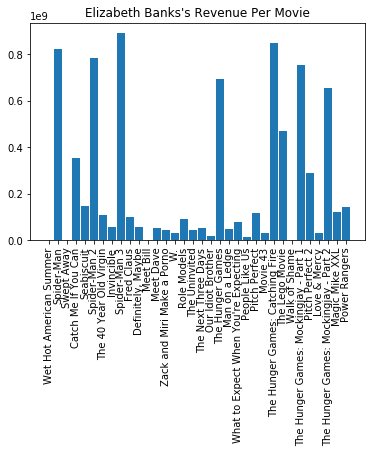

In [23]:
# Revenue Per Movie For Elizabeth Banks
credits['elizabeth'] = ["Elizabeth Banks" in credits['cast'][i] for i in range(0, len(credits))]
elizabeth = credits.loc[credits.elizabeth == True]
elizabeth.shape
elizabeth_id = elizabeth.id.tolist()
elizabeth_id = [str(i) for i in elizabeth_id]
movies_elizabeth = movies[movies['id'].isin(elizabeth_id)]
movies_elizabeth = movies_elizabeth.loc[movies_elizabeth['revenue'] != 0]
plt.bar(movies_elizabeth.title, movies_elizabeth.revenue)
plt.title('Elizabeth Banks\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_elizabeth.revenue.sum())
movies_elizabeth.shape[0]

Throughout her acting career, Elizabeth Banks has been featured in 34 of the movies included in the Kaggle Movies dataset.  Some of her most successful movies include Spider-Man, Spider-Man 2, Spider-Man 3, all of which are part of the Spider Man Franchise by Sony Pictures.  Other successful movies featuring Elizabeth Banks include The Hunger Games, The Hunger Games: Catching Fire, The Hunger Games: Mockingjay: Part 1, and The Hunger Games: Mockingjay: Part 2, all of which are part of the Hunger Games film series by Lionsgate.  

##### #7 Emma Watson

According to IMDb, Emma Watson is the seventh most grossing actress of all time, with a total gross of $2,681.9 in millions.

9639203121.0


18

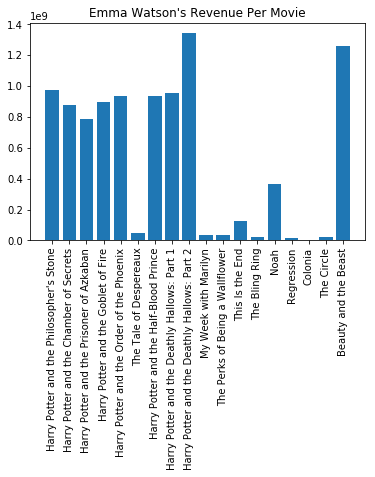

In [24]:
# Revenue Per Movie For Emma Watson
credits['emma'] = ["Emma Watson" in credits['cast'][i] for i in range(0, len(credits))]
emma = credits.loc[credits.emma == True]
emma.shape
emma_id = emma.id.tolist()
emma_id = [str(i) for i in emma_id]
movies_emma = movies[movies['id'].isin(emma_id)]
movies_emma = movies_emma.loc[movies_emma['revenue'] != 0]
plt.bar(movies_emma.title, movies_emma.revenue)
plt.title('Emma Watson\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_emma.revenue.sum())
movies_emma.shape[0]

Throughout her acting career, Emma Watson has been featured in 18 of the movies included in the Kaggle Movies dataset.  Some of her most successful movies, include Harry Potter and the Deathly Hallows: Part 2, Harry Potter and the Deathly Hallows: Part 1,  Harry Potter and the Half Blood Prince, and Harry Potter and the Order of the Phoenix, all of which are part of the Harry Potter franchise from Warner Bros.

##### #8 Sandra Bullock

According to IMDb, Sandra Bullock is the eighth most grossing actress of all time, with a total gross of $2,462.6 in millions.

4902157476.0


27

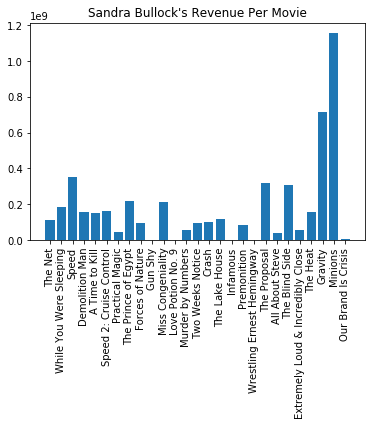

In [25]:
# Revenue Per Movie For Sanda Bullock
credits['sandra'] = ["Sandra Bullock" in credits['cast'][i] for i in range(0, len(credits))]
sandra = credits.loc[credits.sandra == True]
sandra.shape
sandra_id = sandra.id.tolist()
sandra_id = [str(i) for i in sandra_id]
movies_sandra = movies[movies['id'].isin(sandra_id)]
movies_sandra = movies_sandra.loc[movies_sandra['revenue'] != 0]
plt.bar(movies_sandra.title, movies_sandra.revenue)
plt.title('Sandra Bullock\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_sandra.revenue.sum())
movies_sandra.shape[0]

Throughout her acting career, Sandra Bullock has been featured in 27 of the movies included in the Kaggle Movies dataset.  Her most successful movie was Minions, a spin-off prequel of the Despicable Me franchise from Universal Pictures. 

##### #9 Anne Hathaway

According to IMDb, Anne Hathaway is the ninth most grossing actress of all time, with a total gross of $2,414.2 in millions.

6320770592.0


24

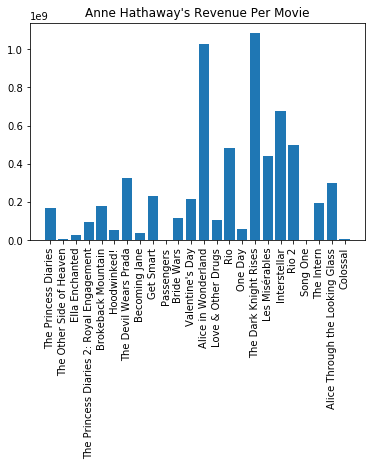

In [28]:
# Revenue Per Movie For Anne Hathaway
credits['anne'] = ["Anne Hathaway" in credits['cast'][i] for i in range(0, len(credits))]
anne = credits.loc[credits.anne == True]
anne.shape
anne_id = anne.id.tolist()
anne_id = [str(i) for i in anne_id]
movies_anne = movies[movies['id'].isin(anne_id)]
movies_anne = movies_anne.loc[movies_anne['revenue'] != 0]
plt.bar(movies_anne.title, movies_anne.revenue)
plt.title('Anne Hathaway\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_anne.revenue.sum())
movies_anne.shape[0]

Throughout her acting career, Sandra Bullock has been featured in 24 of the movies included in the Kaggle Movies dataset.  Some of her most successful movies, include The Dark Knight Rises, which is part of the Marvel Cinematic Universe Franchise, and Alice and Wonderland and Alice Through the Looking Glass, both of which are part of the Alice in Wonderland series by the Walt Disney Production Studios. 

##### #10 Jennifer Lawrence

Last but not least, according to IMDb, Jennifer Lawrence is the tenth most grossing actress of all time, with a total gross of $2,365.4 in millions.

5513581246.0


16

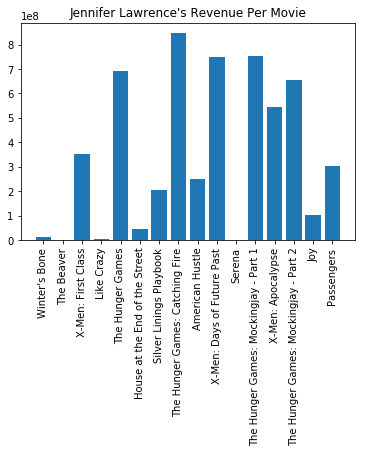

In [29]:
# Revenue Per Movie For Jennifer Lawrence
credits['jennifer'] = ["Jennifer Lawrence" in credits['cast'][i] for i in range(0, len(credits))]
jennifer = credits.loc[credits.jennifer == True]
jennifer.shape
jennifer_id = jennifer.id.tolist()
jennifer_id = [str(i) for i in jennifer_id]
movies_jennifer = movies[movies['id'].isin(jennifer_id)]
movies_jennifer = movies_jennifer.loc[movies_jennifer['revenue'] != 0]
plt.bar(movies_jennifer.title, movies_jennifer.revenue)
plt.title('Jennifer Lawrence\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_jennifer.revenue.sum())
movies_jennifer.shape[0]

Throughout her acting career, Jennifer Lawrence has been featured in 16 of the movies included in the Kaggle Movies dataset.  Some of her most successful movies, include The Hunger Games, The Hunger Games: Catching Fire, The Hunger Games: Mockingjay: Part 1, and The Hunger Games: Mockingjay: Part 2, all of which are part of the Hunger Games film series by Lionsgate.  Other successful movies featuring Jennifer Lawrence include X-Men: First Class, X-Men: Days of Future Past, and X-Men: Apocalypse, all of which are all part of the X-Men Film series by 20th Century Fox.

#### Top 10 Grossing Actors of All Time

We did the same analysis for the top 10 grossing actors, using IMDb’s (The Internet Movie Database) “Highest Grossing Actors of All Time” list, which was compiled back in June 2016 based on each actor’s total gross.  The list can be found here: https://www.imdb.com/list/ls074328260/.

##### #1 Harrison Ford

According to IMDb, Harrison Ford is the number one most grossing actor of all time, with a total gross of $4,871.7 in millions.

9389460989.0


45

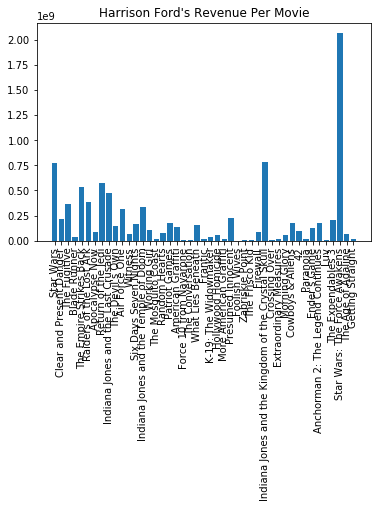

In [31]:
# Revenue Per Movie For Harrison Ford
credits['ford'] = ["Harrison Ford" in credits['cast'][i] for i in range(0, len(credits))]
ford = credits.loc[credits.ford == True]
ford.shape
ford_id = ford.id.tolist()
ford_id = [str(i) for i in ford_id]
movies_ford = movies[movies['id'].isin(ford_id)]
movies_ford = movies_ford.loc[movies_ford['revenue'] != 0]
plt.bar(movies_ford.title, movies_ford.revenue)
plt.title('Harrison Ford\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_ford.revenue.sum())
movies_ford.shape[0]

Throughout his acting career, Harrison Ford has been featured in 45 of the movies included in the Kaggle Movies dataset.  Some of his most successful movies, include Star Wars: The Force Awakens, Star Wars, and Return of the Jedi, all of which are part of the Star Wars franchise by Lucas Film.  Other successful movies featuring Harrison Ford include Indiana Jones and the Kingdom of the Crystal Skull, Indiana Jones and the Temple of Doom, and Indiana Jones and the Last Crusade, all of which are part of the Indiana Jones Franchise by Lucas Film. 

##### #2 Samuel L. Jackson

According to IMDb, Samuel L. Jackson is the second most grossing actor of all time, with a total gross of $4,646.8 in millions.

17109620672.0


80

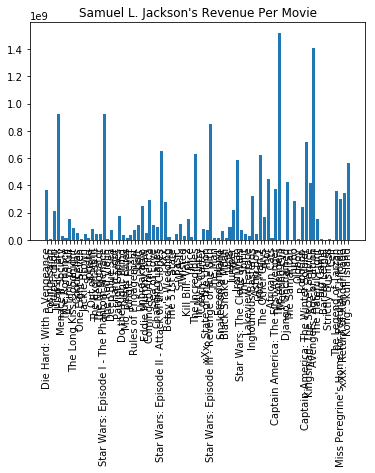

In [32]:
# Revenue Per Movie For Samuel L Jackson
credits['jackson'] = ["Samuel L. Jackson" in credits['cast'][i] for i in range(0, len(credits))]
jackson = credits.loc[credits.jackson == True]
jackson.shape
jackson_id = jackson.id.tolist()
jackson_id = [str(i) for i in jackson_id]
movies_jackson = movies[movies['id'].isin(jackson_id)]
movies_jackson = movies_jackson.loc[movies_jackson['revenue'] != 0]
plt.bar(movies_jackson.title, movies_jackson.revenue)
plt.title('Samuel L. Jackson\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_jackson.revenue.sum())
movies_jackson.shape[0]

Throughout his acting career, Samuel L. Jackson has been featured in 80 of the movies included in the Kaggle Movies dataset.  Some of his most successful movies include Captain America: The First Avenger and Captain America: The Winter Soldier, both of which are part of the Marvel Cinematic Universe Franchise. Other successful movies featuring Samuel L. Jackson include Star Wars: The Force Awakens, Star Wars, and Return of the Jedi, all of which are part of the Star Wars franchise by Lucas Film.  

##### #3 Morgan Freeman

According to IMDb, Morgan Freeman is the third most grossing actor of all time, with a total gross of $4,443.0 in millions.

9537209332.0


62

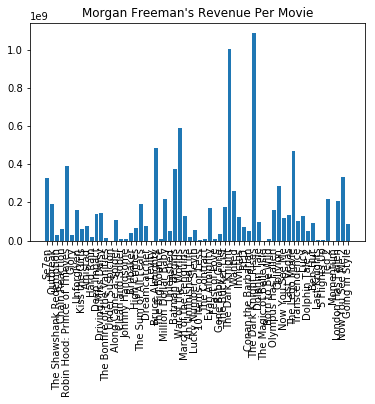

In [33]:
# Revenue Per Movie For Morgan Freeman
credits['freeman'] = ["Morgan Freeman" in credits['cast'][i] for i in range(0, len(credits))]
freeman = credits.loc[credits.freeman == True]
freeman.shape
freeman_id = freeman.id.tolist()
freeman_id = [str(i) for i in freeman_id]
movies_freeman = movies[movies['id'].isin(freeman_id)]
movies_freeman = movies_freeman.loc[movies_freeman['revenue'] != 0]
plt.bar(movies_freeman.title, movies_freeman.revenue)
plt.title('Morgan Freeman\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_freeman.revenue.sum())
movies_freeman.shape[0]

Throughout his acting career, Morgan Freeman has been featured in 62 of the movies included in the Kaggle Movies dataset.  Some of his most successful movies include Batman Begins, The Dark Knight, and The Dark Knight Rises, all of which are part of the Batman series of the Marvel Cinematic Universe Franchise. 

##### #4 Tom Hanks

According to IMDb, Tom Hanks is the fourth most grossing actor of all time, with a total gross of $4,340.7 in millions.

9936142170.0


45

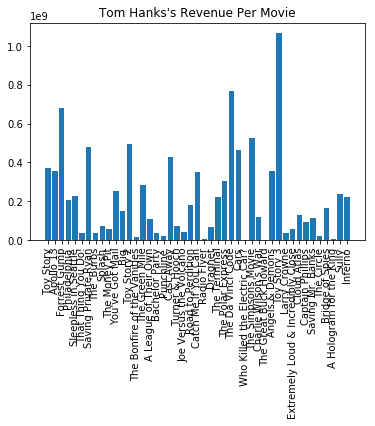

In [34]:
# Revenue Per Movie For Tom Hanks
credits['hanks'] = ["Tom Hanks" in credits['cast'][i] for i in range(0, len(credits))]
hanks = credits.loc[credits.hanks == True]
hanks.shape
hanks_id = hanks.id.tolist()
hanks_id = [str(i) for i in hanks_id]
movies_hanks = movies[movies['id'].isin(hanks_id)]
movies_hanks = movies_hanks.loc[movies_hanks['revenue'] != 0]
plt.bar(movies_hanks.title, movies_hanks.revenue)
plt.title('Tom Hanks\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_hanks.revenue.sum())
movies_hanks.shape[0]

Throughout his acting career, Tom Hanks has been featured in 45 of the movies included in the Kaggle Movies dataset.  Some of his most successful movies include Toy Story, Toy Story 2, and Toy Story 3, all of which are part of the Toy Story film series franchise by Pixar and Walt Disney Pictures.

##### #5 Robert Downey Jr.

According to IMDb, Robert Downey Jr. is the fifth most grossing actor of all time, with a total gross of $3,943.6 in millions.

8958027886.0


40

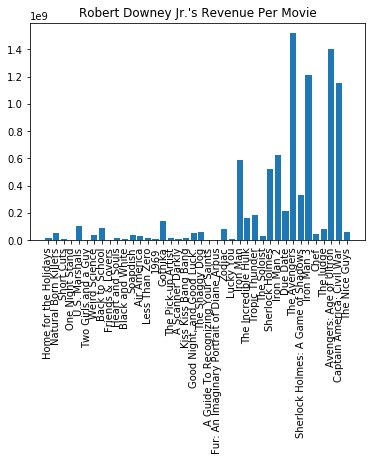

In [35]:
# Revenue Per Movie For Robert Downey Jr.
credits['downey'] = ["Robert Downey Jr." in credits['cast'][i] for i in range(0, len(credits))]
downey = credits.loc[credits.downey == True]
downey.shape
downey_id = downey.id.tolist()
downey_id = [str(i) for i in downey_id]
movies_downey = movies[movies['id'].isin(downey_id)]
movies_downey = movies_downey.loc[movies_downey['revenue'] != 0]
plt.bar(movies_downey.title, movies_downey.revenue)
plt.title('Robert Downey Jr.\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_downey.revenue.sum())
movies_downey.shape[0]

Throughout his acting career, Robert Downey Jr. has been featured in 40 of the movies included in the Kaggle Movies dataset.  Some of his most successful movies include Iron Man, Iron Man 2, Iron Man 3, The Avengers, and The Avengers: Age of Ultron,  all of which are part of the Marvel Cinematic Universe Franchise.

##### #6 Eddie Murphy

According to IMDb, Eddie Murphy is the sixth most grossing actor of all time, with a total gross of $3,810.4 in millions.

6723346747.0


36

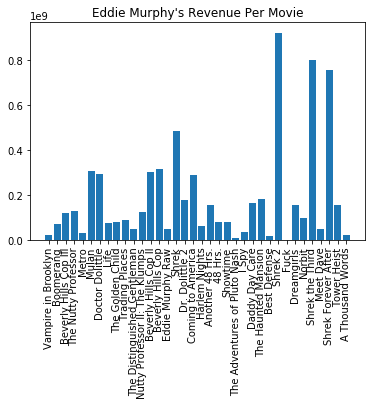

In [36]:
# Revenue Per Movie For Eddie Murphy
credits['murphy'] = ["Eddie Murphy" in credits['cast'][i] for i in range(0, len(credits))]
murphy = credits.loc[credits.murphy == True]
murphy.shape
murphy_id = murphy.id.tolist()
murphy_id = [str(i) for i in murphy_id]
movies_murphy = movies[movies['id'].isin(murphy_id)]
movies_murphy = movies_murphy.loc[movies_murphy['revenue'] != 0]
plt.bar(movies_murphy.title, movies_murphy.revenue)
plt.title('Eddie Murphy\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_murphy.revenue.sum())
movies_murphy.shape[0]

Throughout his acting career, Eddie Murphy has been featured in 36 of the movies included in the Kaggle Movies dataset.  Some of his most successful movies include Shrek, Shrek 2, Shrek the Third, and Shrek Forever After, all of which are part of the Shrek franchise from Dreamworks Animation. 

##### #7 Tom Cruise

According to IMDb, Tom Cruise is the seventh most grossing actor of all time, with a total gross of $3,587.2 in millions.

10084762985.0


43

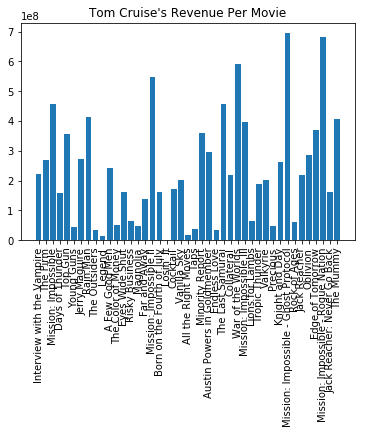

In [37]:
# Revenue Per Movie For Tom Cruise
credits['cruise'] = ["Tom Cruise" in credits['cast'][i] for i in range(0, len(credits))]
cruise = credits.loc[credits.cruise == True]
cruise.shape
cruise_id = cruise.id.tolist()
cruise_id = [str(i) for i in cruise_id]
movies_cruise = movies[movies['id'].isin(cruise_id)]
movies_cruise = movies_cruise.loc[movies_cruise['revenue'] != 0]
plt.bar(movies_cruise.title, movies_cruise.revenue)
plt.title('Tom Cruise\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_cruise.revenue.sum())
movies_cruise.shape[0]

Throughout his acting career, Tom Cruise has been featured in 43 of the movies included in the Kaggle Movies dataset.  Some of his most successful movies include Mission Impossible: Growth Protocol, Mission Impossible: Rogue Nation, Mission Impossible 3, and Mission Impossible 2, all of which are part of the Mission Impossible spy film series by Paramount Pictures.

##### #8 Johnny Depp

According to IMDb, Johnny Depp is the eighth most grossing actor of all time, with a total gross of $3,366.3 in millions.

10653760641.0


49

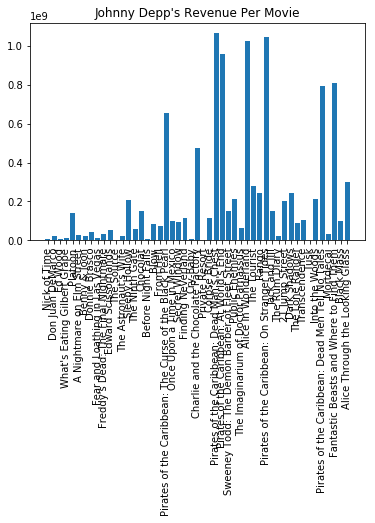

In [38]:
# Revenue Per Movie For Johnny Depp
credits['depp'] = ["Johnny Depp" in credits['cast'][i] for i in range(0, len(credits))]
depp = credits.loc[credits.depp == True]
depp.shape
depp_id = depp.id.tolist()
depp_id = [str(i) for i in depp_id]
movies_depp = movies[movies['id'].isin(depp_id)]
movies_depp = movies_depp.loc[movies_depp['revenue'] != 0]
plt.bar(movies_depp.title, movies_depp.revenue)
plt.title('Johnny Depp\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_depp.revenue.sum())
movies_depp.shape[0]

Throughout his acting career, Johnny Depp has been featured in 49 of the movies included in the Kaggle Movies dataset.  Some of his most successful movies include Pirates of the Caribbean: Dead Man’s Chest, Pirates of the Caribbean: Strange Tides, Pirates of the Caribbean: A World’s End, and Pirates of the Caribbean: Dead Men Tell No Tales, all of which are part of the Pirates of the Caribbean Film Series by Walt Disney Pictures. 

##### #9 Michael Caine

According to IMDb, Michael Caine is the ninth most grossing actor of all time, with a total gross of $3,340.5 in millions.

8053404838.0


42

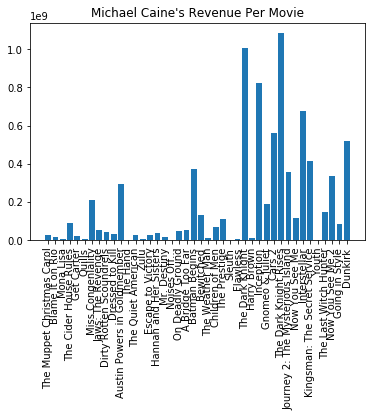

In [39]:
# Revenue Per Movie For Michael Caine
credits['caine'] = ["Michael Caine" in credits['cast'][i] for i in range(0, len(credits))]
caine = credits.loc[credits.caine == True]
caine.shape
caine_id = caine.id.tolist()
caine_id = [str(i) for i in caine_id]
movies_caine = movies[movies['id'].isin(caine_id)]
movies_caine = movies_caine.loc[movies_caine['revenue'] != 0]
plt.bar(movies_caine.title, movies_caine.revenue)
plt.title('Michael Caine\'s Revenue Per Movie')
plt.xticks(rotation=90)


print(movies_caine.revenue.sum())
movies_caine.shape[0]

Throughout his acting career, Michael Caine has been featured in 42 of the movies included in the Kaggle Movies dataset.  Some of his most successful movies include The Dark Knight, and The Dark Knight Rises, all of which are part of the Batman series of the Marvel Cinematic Universe Franchise. 

##### #10 Gary Oldman

Last but not least, according to IMDb, Gary Oldman is the tenth most grossing actor of all time, with a total gross of $3,294.0 in millions.

10534767069.0


36

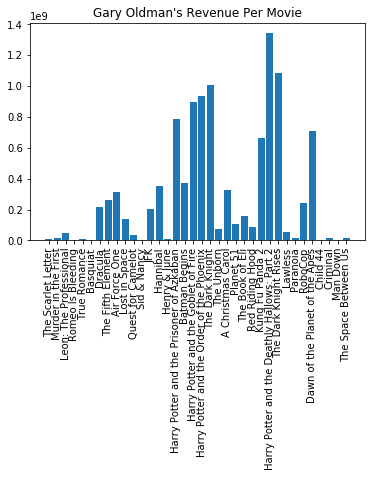

In [40]:
# Revenue Per Movie For Gary Oldman
credits['oldman'] = ["Gary Oldman" in credits['cast'][i] for i in range(0, len(credits))]
oldman = credits.loc[credits.oldman == True]
oldman.shape
oldman_id = oldman.id.tolist()
oldman_id = [str(i) for i in oldman_id]
movies_oldman = movies[movies['id'].isin(oldman_id)]
movies_oldman = movies_oldman.loc[movies_oldman['revenue'] != 0]
plt.bar(movies_oldman.title, movies_oldman.revenue)
plt.title('Gary Oldman\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_oldman.revenue.sum())
movies_oldman.shape[0]

Throughout his acting career, Gary Oldman has been featured in 36 of the movies included in the Kaggle Movies dataset.  Some of his most successful movies include include Harry Potter and the Deathly Hallows: Part 2, Harry Potter and the Deathly Hallows: Part 1,  Harry Potter and the Half Blood Prince, and Harry Potter and the Order of the Phoenix, all of which are part of the Harry Potter franchise from Warner Bros.

Based on our above analysis of the Top 10 most Grossing Actors and Top 10 most Grossing Actresses of all time, we found that the most successful, quantified by revenue, movies of each of these stars tended to be ones that were part of a movies series franchise.  Stemming from this, we decided to compare the success of movies that are or are not a part of a larger movie series franchise, to see if similar trends exist across all movies, regardless of whether or not they feature huge (Top 10) movie stars.

### Research Question 2: Does being part of a series impact revenue?

We created a boolean column of whether or not a movie belongs to a series to compare the success, quantified by revenue, differences between movies that are and aren't a part of series. 

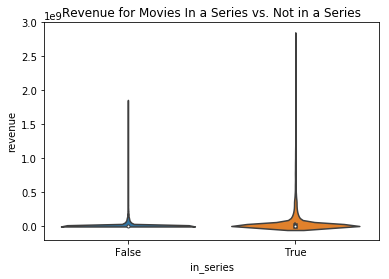

In [41]:
movies['in_series'] = movies.belongs_to_collection.isna() == False
movies.head()#adds column of booleans for if movie is from a series or not
sns.violinplot(x='in_series', y='revenue', data=movies)
plt.title("Revenue for Movies In a Series vs. Not in a Series")
plt.show()

In [29]:
movies.groupby('in_series').revenue.mean() #higher revenue for movies in a series

in_series
False    6.453015e+06
True     5.460957e+07
Name: revenue, dtype: float64

From the violin plot and average revenue calculations, we can see that for movies that are part of a series, on average have a much higher revenue in comparison to the average revenue produced by a movie that is not part of a series. We also thought that the production company behind a movie would have an impact on the chance a movie has of being successful. We wanted to see if the top production companies showed similar success trends in their movie series compared to their success in movies not part of a series. 

### Research Question 3: Do production companies indeed generate higher revenue for movies in series?

We chose to look at the list of top 10 most successful production companies, according to the Reel Rundown, which can be found here: https://reelrundown.com/film-industry/Top-10-Movie-Production-Companies, looking at the proportions of movies in series among all of the company's movies in comparison to the proportions of movies in series among just the company's top 100 movies.  

In [42]:
movies_prod = movies.sort_values(by = 'revenue', ascending = False)

In [43]:
prod_companies = movies_prod[pd.notnull(movies_prod['production_companies'])]
prod_companies = prod_companies.sort_values(by = 'revenue', ascending = False)
prod_companies['belongs_to_series'] = prod_companies.belongs_to_collection.isna() == False

#### #1 Warner Bros.

In [44]:
warner_bros = prod_companies[prod_companies['production_companies'].str.contains("Warner Bros.|New Line Cinema|Castle Rock|Turner Entertainment|DC Films")]
print(warner_bros.shape)

(1711, 27)


In [45]:
warner_bros.belongs_to_series.value_counts()

False    1434
True      277
Name: belongs_to_series, dtype: int64

In [46]:
warner_bros = warner_bros.sort_values(by = 'revenue', ascending = False)
warner_bros = warner_bros.iloc[1:101,];
warner_bros.belongs_to_series.value_counts()

True     65
False    35
Name: belongs_to_series, dtype: int64

Out of all of the movies produced by the Warner Bros, 19.3% of the movies belonged to a series. So 277/1711 of Warner Bros. movies were part of a series. Out of the top 100 movies produced by the Warner Bros, 65% of the movies belonged to a series.

#### #2 Sony Pictures

In [47]:
sony_pictures = prod_companies[prod_companies['production_companies'].str.contains("Sony|TriStar Pictures|Screen Gems|Destination Films|Affirm Films")]

In [48]:
sony_pictures.shape

(448, 27)

In [49]:
sony_pictures.belongs_to_series.value_counts()

False    359
True      89
Name: belongs_to_series, dtype: int64

In [50]:
sony_pictures = sony_pictures.sort_values(by = 'revenue', ascending = False)
sony_pictures = sony_pictures.iloc[1:101,];
sony_pictures.belongs_to_series.value_counts()

False    69
True     31
Name: belongs_to_series, dtype: int64

Out of all of the movies produced by Sony Pictures, 19.9% of the movies belonged to a series. So 89/448 Sony Pictures movies belonged to a series. Out of the top 100 movies produced by Sony Pictures, 31% of the movies belonged to a series

#### #3 Walt Disney

In [51]:
walt_disney = prod_companies[prod_companies['production_companies'].str.contains("Disney|Lucas Film|Pixar|Marvel Studios")]

In [52]:
walt_disney.shape

(564, 27)

In [53]:
walt_disney.belongs_to_series.value_counts()

False    376
True     188
Name: belongs_to_series, dtype: int64

In [42]:
walt_disney = walt_disney.sort_values(by = 'revenue', ascending = False)
walt_disney = walt_disney.iloc[1:101,];
walt_disney.belongs_to_series.value_counts()

True     60
False    40
Name: belongs_to_series, dtype: int64

Out of all of the movies produced by Walt Disney Studios, 33.3% of the movies belonged to a series. Out of the top 100 movies produced by Walt Disney Studios, 60% of the movies belonged to a series.

#### #4 Universal Pictures

In [43]:
universal_pictures = prod_companies[prod_companies['production_companies'].str.contains("Universal Studios|DreamWorks|Focus Features|Working Title Films")]

In [44]:
universal_pictures.shape

(339, 26)

In [45]:
universal_pictures.belongs_to_series.value_counts()

False    283
True      56
Name: belongs_to_series, dtype: int64

In [46]:
universal_pictures = universal_pictures.sort_values(by = 'revenue', ascending = False)
universal_pictures = universal_pictures.iloc[1:101,];
universal_pictures.belongs_to_series.value_counts()

False    70
True     30
Name: belongs_to_series, dtype: int64

Out of all of the movies produced by Universal Pictures, 16.5% of the movies belonged to a series. Out of the top 100 movies produced by Universal Pictures, 30% of the movies belonged to a series.

#### #5 20th Century Fox

In [47]:
century_fox = prod_companies[prod_companies['production_companies'].str.contains("Fox|fox")];

In [48]:
century_fox.shape

(1206, 26)

In [49]:
century_fox.belongs_to_series.value_counts()

False    989
True     217
Name: belongs_to_series, dtype: int64

In [50]:
century_fox = century_fox.sort_values(by = 'revenue', ascending = False)
century_fox = century_fox.iloc[1:101,];
century_fox.belongs_to_series.value_counts()

True     55
False    45
Name: belongs_to_series, dtype: int64

Out of all of the movies produced by 20th Century Fox, 18.0% of the movies belonged to a series. Out of the top 100 movies produced by 20th Century Fox, 55% of the movies belonged to a series.

#### #6 Paramount Pictures

In [51]:
paramount = prod_companies[prod_companies['production_companies'].str.contains("Paramount|Nickelodean|MTV")];

In [52]:
paramount.shape

(1081, 26)

In [53]:
paramount.belongs_to_series.value_counts()

False    927
True     154
Name: belongs_to_series, dtype: int64

In [54]:
paramount = paramount.sort_values(by = 'revenue', ascending = False)
paramount = paramount.iloc[1:101,];
paramount.belongs_to_series.value_counts()

True     51
False    49
Name: belongs_to_series, dtype: int64

Out of all of the movies produced by Paramount Pictures, 14.2% of the movies belonged to a series. Out of the top 100 movies produced by Paramount Pictures, 51% of the movies belonged to a series.

#### #7 Lionsgate Films

In [55]:
lionsgate = prod_companies[prod_companies['production_companies'].str.contains("Lionsgate|Roadside Attractions|summmit|Summit|lionsgate|Pantelion|Codeblack")];

In [56]:
lionsgate.shape

(193, 26)

In [57]:
lionsgate.belongs_to_series.value_counts()

False    145
True      48
Name: belongs_to_series, dtype: int64

In [58]:
lionsgate = lionsgate.sort_values(by = 'revenue', ascending = False)
lionsgate = lionsgate.iloc[1:101,];
lionsgate.belongs_to_series.value_counts()

False    64
True     36
Name: belongs_to_series, dtype: int64

Out of all of the movies produced by Lionsgate Films, 24.9% of the movies belonged to a series. Out of the top 100 movies produced by Lionsgate Films, 36% of the movies belonged to a series.

#### #8 The Weinstein Company

In [59]:
weinstein = prod_companies[prod_companies['production_companies'].str.contains("Weinstein|Lantern")];

In [60]:
weinstein.shape

(70, 26)

In [61]:
weinstein.belongs_to_series.value_counts()

False    62
True      8
Name: belongs_to_series, dtype: int64

Only 11.4% of the movies produced by the Weinstein Company were released as part of a series.

#### #9 Metro-Goldwyn-Mayer Studios

In [62]:
metro_goldwyn = prod_companies[prod_companies['production_companies'].str.contains("Goldwyn")]

In [63]:
metro_goldwyn.shape

(1200, 26)

In [64]:
metro_goldwyn.belongs_to_series.value_counts()

False    1100
True      100
Name: belongs_to_series, dtype: int64

In [65]:
metro_goldwyn = metro_goldwyn.sort_values(by = 'revenue', ascending = False)
metro_goldwyn = metro_goldwyn.iloc[1:101,];
metro_goldwyn.belongs_to_series.value_counts()

False    63
True     37
Name: belongs_to_series, dtype: int64

Out of all of the movies produced by Metro-Goldwyn-Mayer Studios, 8.3% of the movies belonged to a series. Out of the top 100 movies produced by Metro-Goldwyn-Mayer Studios, 37% of the movies belonged to a series.

#### #10 DreamWorks Pictures

dreamworks = prod_companies[prod_companies['production_companies'].str.contains("DreamWorks|dreamworks")];

In [68]:
dreamworks = prod_companies[prod_companies['production_companies'].str.contains("DreamWorks")]

In [69]:
dreamworks.shape

(155, 26)

In [70]:
dreamworks.belongs_to_series.value_counts()

False    129
True      26
Name: belongs_to_series, dtype: int64

In [71]:
dreamworks = dreamworks.sort_values(by = 'revenue', ascending = False)
dreamworks = dreamworks.iloc[1:101,];
dreamworks.belongs_to_series.value_counts()

False    77
True     23
Name: belongs_to_series, dtype: int64

Out of all of the movies produced by DreamWorks Pictures, 16.7% of the movies belonged to a series. Out of the top 100 movies produced by Dreamworks Pictures, 23% of the movies belonged to a series.

Overall: Overall, the top 10 production companies showed a much higher proportion of movies in series among their top 100 movies than in all of their movies.

### Research Question 4: Do production companies use certain words more often while advertising their movie series?

In [155]:
series = movies.loc[movies.belongs_to_collection.notnull()]
sample = list(series.tagline)
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

sample = [x for x in sample if str(x) != 'nan']
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())


vec = CountVectorizer(stop_words = 'english')
X = vec.fit_transform(sample)
features = vec.get_feature_names()
visualizer = FreqDistVisualizer(features=features, legend_loc = "lower right")
visualizer.fit(X)
visualizer.poof()

ModuleNotFoundError: No module named 'yellowbrick'

### Research Question 5: Does a director's alma mater have an effect on movie revenue?

In [72]:
directors = pd.read_csv("director.csv")

In [73]:
directors = directors.loc[directors.title_year<2016]
directors.groupby('Alma mater').count()['director_name'].sort_values(ascending=False)[:7]

Alma mater
New York University                      46
University of Southern California        34
California Institute of the Arts         21
Harvard University                       17
Wesleyan University                      13
Yale University                          12
University of California, Los Angeles    10
Name: director_name, dtype: int64

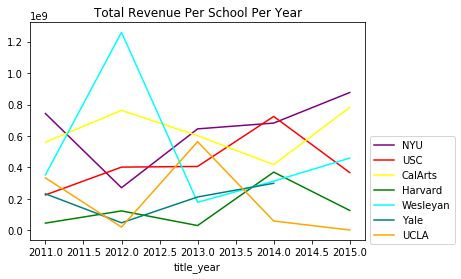

In [74]:
NYU = directors.loc[directors['Alma mater']=='New York University']
NYU.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="purple")

USC = directors.loc[directors['Alma mater']=='University of Southern California']
USC.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="red")

CalArts = directors.loc[directors['Alma mater']=='California Institute of the Arts']
CalArts.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="yellow")

Harvard = directors.loc[directors['Alma mater']=='Harvard University']
Harvard.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="green")

Wesleyan = directors.loc[directors['Alma mater']=='Wesleyan University']
Wesleyan.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="cyan")

Yale = directors.loc[directors['Alma mater']=='Yale University']
Yale.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="teal")


UCLA = directors.loc[directors['Alma mater']=='University of California, Los Angeles']
UCLA.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="orange", title="Total Revenue Per School Per Year")

plt.legend(["NYU","USC","CalArts", "Harvard", "Wesleyan", "Yale", "UCLA"], bbox_to_anchor=(1, 0.5))

### Data Modeling: Can we predict revenue for the top 30 grossing movie series of all time?

Our analysis suggests that movie series tend to bring in higher revenue, so now we want to look into the top 30 grossing movie series of all time. 

In [75]:
in_series_df = movies.loc[movies.in_series==True]
in_series_df.shape

(4494, 25)

There are 4494 movies in our dataset that belong to a series.

Our first step is to sum the movie revenue across each series in the datset, and then we sort the summed revenue to find the top 30 movie series.

In [156]:
top_30_series= in_series_df.groupby('belongs_to_collection', as_index=False).sum().iloc[:,[0,1]].sort_values('revenue', ascending=False).reset_index().iloc[:30,:]

top_30_series['series_name'] = 0
for i in range(0, len(top_30_series)):
    temp = top_30_series.belongs_to_collection.iloc[i]
    temp = ast.literal_eval(temp)
    top_30_series.series_name.iloc[i] = temp['name']

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [157]:
top_30_series.head()

,index,belongs_to_collection,revenue,series_name
0,199,"{'id': 1241, 'name': 'Harry Potter Collection'...",7.707367e+09,Harry Potter Collection
1,3,"{'id': 10, 'name': 'Star Wars Collection', 'po...",7.434495e+09,Star Wars Collection
2,1481,"{'id': 645, 'name': 'James Bond Collection', '...",7.106970e+09,James Bond Collection
3,1641,"{'id': 9485, 'name': 'The Fast and the Furious...",5.125099e+09,The Fast and the Furious Collection
4,840,"{'id': 295, 'name': 'Pirates of the Caribbean ...",4.521577e+09,Pirates of the Caribbean Collection


In [158]:
# creating array of collection/series names
top_30_series_array = top_30_series.series_name
top_30_series_array
s = '|'
top_30_series_array_string = s.join(top_30_series_array)

movies_top_30_series_df = in_series_df[in_series_df['belongs_to_collection'].str.contains(top_30_series_array_string)]
movies_top_30_series_df = movies_top_30_series_df[['belongs_to_collection','budget','id','production_companies','release_date','revenue','original_title','runtime','vote_average','vote_count' ]]
movies_top_30_series_df.reset_index()

In [159]:
#converts budget to numeric
for i in range(0,len(movies_top_30_series_df)):
    movies_top_30_series_df.budget.iloc[i] = float(movies_top_30_series_df.budget.iloc[i])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


This dataframe contains all movies that belong to the top 30 grossing series.

In [160]:
movies_top_30_series_df.head() #data frame of movies that belong to the top 30 grossing series

,belongs_to_collection,budget,id,production_companies,release_date,revenue,original_title,runtime,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,862,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,Toy Story,81.0,7.7,5415.0
9,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,710,"[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,352194034.0,GoldenEye,130.0,6.6,1194.0
256,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,11,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...",1977-05-25,775398007.0,Star Wars,121.0,8.1,6778.0
475,"{'id': 328, 'name': 'Jurassic Park Collection'...",63000000,329,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1993-06-11,920100000.0,Jurassic Park,127.0,7.6,4956.0
582,"{'id': 528, 'name': 'The Terminator Collection...",100000000,280,"[{'name': 'Lightstorm Entertainment', 'id': 57...",1991-07-01,520000000.0,Terminator 2: Judgment Day,137.0,7.7,4274.0


In [161]:
# adds a column for series name (extracted from belongs_to_collection column)
movies_top_30_series_df['series_name'] = 0
for i in range(0, len(movies_top_30_series_df)):
    temp = movies_top_30_series_df.belongs_to_collection.iloc[i]
    temp = ast.literal_eval(temp)
    movies_top_30_series_df.series_name.iloc[i] = temp['name']
    
movies_top_30_series_df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,belongs_to_collection,budget,id,production_companies,release_date,revenue,original_title,runtime,vote_average,vote_count,series_name
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,862,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,Toy Story,81.0,7.7,5415.0,Toy Story Collection
9,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,710,"[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,352194034.0,GoldenEye,130.0,6.6,1194.0,James Bond Collection
256,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,11,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...",1977-05-25,775398007.0,Star Wars,121.0,8.1,6778.0,Star Wars Collection
475,"{'id': 328, 'name': 'Jurassic Park Collection'...",63000000,329,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1993-06-11,920100000.0,Jurassic Park,127.0,7.6,4956.0,Jurassic Park Collection
582,"{'id': 528, 'name': 'The Terminator Collection...",100000000,280,"[{'name': 'Lightstorm Entertainment', 'id': 57...",1991-07-01,520000000.0,Terminator 2: Judgment Day,137.0,7.7,4274.0,The Terminator Collection


### OLS Model: Predicting Revenue for Movies in Top 30 Grossing Movie Series

In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

We decided to use an OLS model to predict revenue for the top 30 grossing movie series in our dataset. We subsetted movies in the top 30 grossing series from the original kaggle movies metadata csv file. Based on the correlation matrix, vote count and budget are highly correlated with revenue while vote average and runtime have very low correlation coefficients with revenue. However, we built 4 OLS models, each including 1 more predictor, to see which factors had the strongest relationship with revenue.

In [84]:
movies_top_30_series_df.corr()

,budget,revenue,runtime,vote_average,vote_count
budget,1.000000,0.662870,0.430648,0.109523,0.484889
revenue,0.662870,1.000000,0.443525,0.319769,0.705360
runtime,0.430648,0.443525,1.000000,0.365591,0.487538
vote_average,0.109523,0.319769,0.365591,1.000000,0.543240
vote_count,0.484889,0.705360,0.487538,0.543240,1.000000


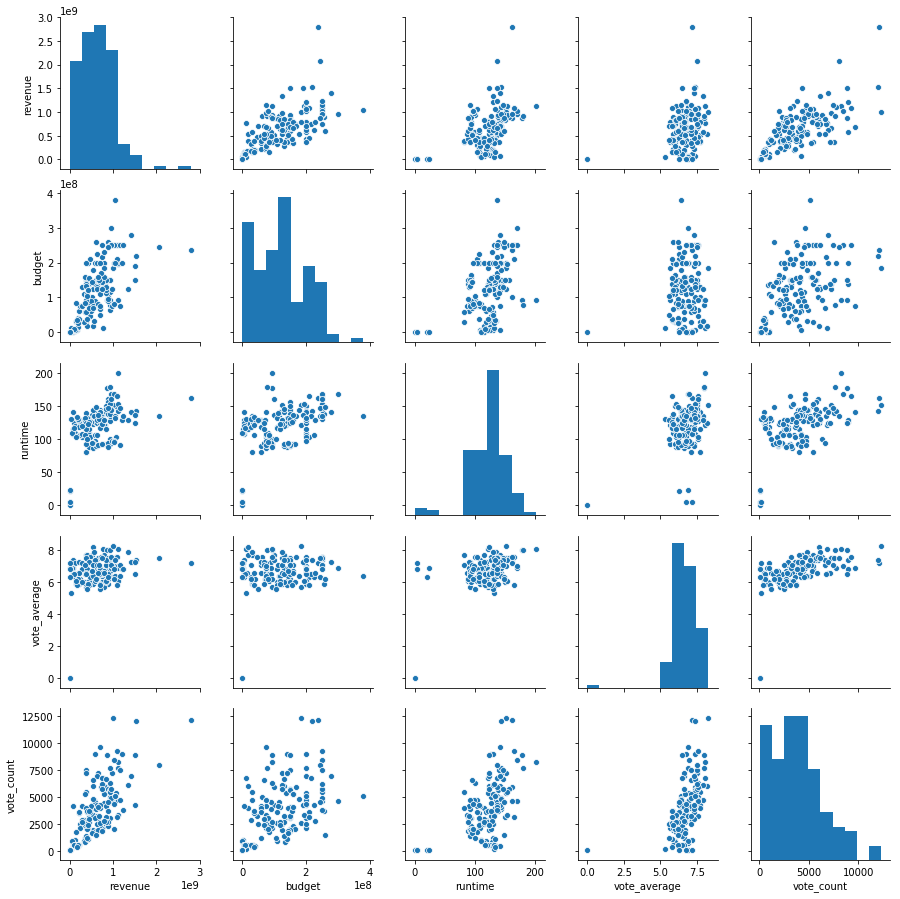

In [85]:
print(sns.pairplot(movies_top_30_series_df[['revenue', 'budget','runtime','vote_average','vote_count']]))

Based on this correlation matrix, we can see a strong correlation between revenue and vote count and budget, for movies in the top 30 grossing series. We decided to build an OLS model to predict revenue from the numeric factors in the dataset. We created 4 OLS models, each model adding a predictor, so that we could see how each additional predictor affects the prediction.

The first OLS model only uses vote count to predict revenue as vote count is the highest correlated with revenue. The R-squared value is decent.

In [86]:
ols_model1 = smf.ols('revenue ~ vote_count', data=movies_top_30_series_df)
ols_model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.75e-24
Time:                        11:11:58   Log-Likelihood:                -3219.1
No. Observations:                 154   AIC:                             6442.
Df Residuals:                     152   BIC:                             6448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.078e+08   4.24e+07      4.895      0.000    1.24e+08    2.92e+08
vote_count  1.109e+05   9037.769     12.268      0.000     9.3e+04    1.29e+05
==============================================================================
Omnibus:                       24.896   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.102
Skew:                           0.766   Prob(JB):                     1.61e-10
Kurtosis:                       5.164   Cond. No.                     8.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The second OLS model predicts revenue from vote count and budget, as these are the 2 factors that are most highly correlated with revenue. The R-squared value improves a little bit.

In [87]:
ols_model2 = smf.ols('revenue ~ vote_count + budget', data=movies_top_30_series_df)
ols_model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.62e-33
Time:                        11:11:58   Log-Likelihood:                -3195.1
No. Observations:                 154   AIC:                             6396.
Df Residuals:                     151   BIC:                             6405.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.713e+07   4.11e+07      1.635      0.104    -1.4e+07    1.48e+08
vote_count   7.89e+04   8871.478      8.894      0.000    6.14e+04    9.64e+04
budget         2.1661      0.291      7.433      0.000       1.590       2.742
==============================================================================
Omnibus:                       48.692   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.904
Skew:                           1.188   Prob(JB):                     5.15e-35
Kurtosis:                       7.355   Cond. No.                     2.97e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The third OLS model predicts revenue from vote count and budget and runtime, even though runtime is not as highly correlated with revenue. The R-squared value does not improve.

In [88]:
ols_model3 = smf.ols('revenue ~ vote_count + budget + runtime', data=movies_top_30_series_df)
ols_model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     86.09
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.91e-32
Time:                        11:11:58   Log-Likelihood:                -3195.0
No. Observations:                 154   AIC:                             6398.
Df Residuals:                     150   BIC:                             6410.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.461e+07   8.54e+07      0.405      0.686   -1.34e+08    2.03e+08
vote_count  7.745e+04   9507.909      8.145      0.000    5.87e+04    9.62e+04
budget         2.1327      0.302      7.058      0.000       1.536       2.730
runtime     3.484e+05   8.02e+05      0.434      0.665   -1.24e+06    1.93e+06
==============================================================================
Omnibus:                       49.830   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.078
Skew:                           1.215   Prob(JB):                     3.87e-36
Kurtosis:                       7.417   Cond. No.                     6.17e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The fourth OLS model predicts revenue from vote count and budget and runtime and vote average, even though runtime and vote average are not highly correlated with revenue. The R-squared value does not improve by much at all.

In [89]:
ols_model4 = smf.ols('revenue ~ vote_count + budget + runtime + vote_average', data=movies_top_30_series_df)
ols_model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     64.14
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.93e-31
Time:                        11:12:03   Log-Likelihood:                -3195.0
No. Observations:                 154   AIC:                             6400.
Df Residuals:                     149   BIC:                             6415.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.485e+07    1.9e+08      0.237      0.813    -3.3e+08    4.19e+08
vote_count    7.778e+04    1.1e+04      7.055      0.000     5.6e+04    9.96e+04
budget           2.1279      0.314      6.786      0.000       1.508       2.747
runtime       3.585e+05   8.22e+05      0.436      0.663   -1.27e+06    1.98e+06
vote_average -1.815e+06      3e+07     -0.061      0.952    -6.1e+07    5.74e+07
==============================================================================
Omnibus:                       49.630   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.841
Skew:                           1.211   Prob(JB):                     7.19e-36
Kurtosis:                       7.399   Cond. No.                     1.38e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusions: Based on these models, we can see that vote count and budget are the factors most correlated with movie revenue.

### Insights through visualizations: Did directors who produced movies in the past 10 years attend top 3 film schools: NYU, USC, UCLA?

In [6]:
director=pd.read_csv('director.csv')

In [7]:
names=director.iloc[:,0:2]
new_names=names.drop_duplicates()
new_names.shape

(484, 2)

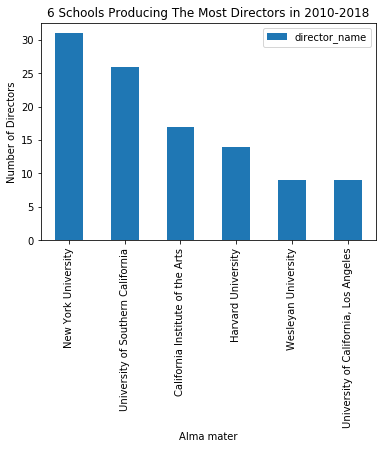

In [8]:
counter=new_names.groupby(['Alma mater']).count()
#counter
graphic1=counter.sort_values(by=['director_name'],ascending=False).iloc[0:6,]
ax=graphic1.plot.bar()
ax.set_ylabel('Number of Directors')
ax.set_title('6 Schools Producing The Most Directors in 2010-2018')
plt.show()

Top 3 schools producing the most directors are NYU, USC and Calarts

### Do graduates of certain schools produce movies with higher ratings?

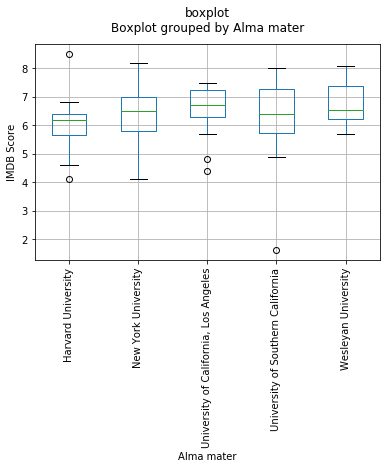

In [12]:
index = (director.loc[:,'Alma mater']=="New York University")|(director.loc[:,'Alma mater']=="University of Southern California")|(director.loc[:,'Alma mater']=="Harvard University")|(director.loc[:,'Alma mater']=="Wesleyan University")|(director.loc[:,'Alma mater']=="University of California, Los Angeles")

director_rating=director.loc[index,['Alma mater','imdb_score']]
mean_ratings=director_rating.groupby(['Alma mater']).mean()
mean_ratings
#plot()

director_rating.loc[:,'Alma mater']=director_rating.loc[:,'Alma mater'].rename({"New York University":'NYU',"University of Southern California": "USC","Harvard University":"Harvard","Wesleyan University":"Wesleyan","University of California, Los Angeles":"UCLA"})
#director_rating

#plt.boxplot(director_rating)
director_rating.boxplot(column='imdb_score',by='Alma mater')
plt.xticks(rotation=90)
plt.ylabel('IMDB Score')
plt.title("boxplot", y = 1.1)
plt.show()

The average ratings seem to fluctuate between 6 and 7. 

### What about female directors?

Text(0.5,1,'Distribution of Women and Men Directors')

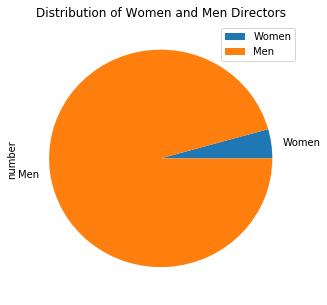

In [13]:
e=pd.DataFrame({'number':[21,463]},index=['Women',"Men"])
e.plot.pie(y='number',figsize=(5,5))
plt.title('Distribution of Women and Men Directors')

only 4% of the directors in the 2010s are females

Text(0,0.5,'IMDB Score')

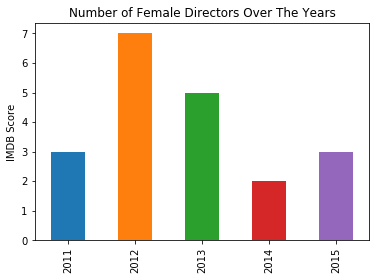

In [14]:
women_index=director.Notes.dropna()
women_index=women_index.index[2:,]

women_data=director.iloc[women_index,]
women_data=women_data.title_year
women_data=women_data.astype('category')
women_data.value_counts().sort_index().plot(kind='bar')
plt.title("Number of Female Directors Over The Years")
plt.ylabel('IMDB Score')
plt.ylabel('IMDB Score')

Maximum number of female directors are in 2012

### Did #metoo have an affect on the directors implicated, if any?

In [15]:
#directors implicated by the movement
s1=director[director.director_name=='Brett Ratner']
s2=director[director.director_name=='John Lasseter']
s3=director[director.director_name=='Oliver Stone']
s4=director[director.director_name=='Bryan Singer']

In [16]:
#appended the file with updated movies, if any
me_too=pd.read_csv('me_too.csv')

Text(0.5,1,'Number of Movies Directed Before And After #metoo')

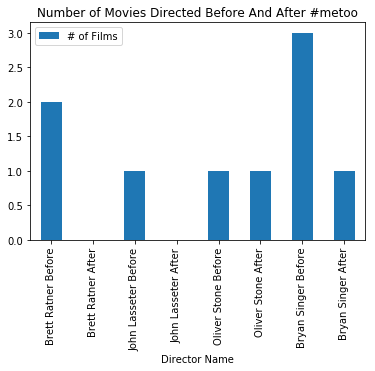

In [17]:
director_change=[['Brett Ratner Before',2],['Brett Ratner After',0],['John Lasseter Before',1],['John Lasseter After',0],['Oliver Stone Before',1],['Oliver Stone After',1],['Bryan Singer Before',3],['Bryan Singer After',1]]

director_change=pd.DataFrame(director_change,columns=['Director Name','# of Films'])

director_change=director_change.set_index('Director Name')
director_change.plot.bar()
plt.title("Number of Movies Directed Before And After #metoo")


In [18]:
me_too.loc[:,['Rating','Audience']].corr()

,Rating,Audience
Rating,1.000000,0.965077
Audience,0.965077,1.000000


In [19]:
me_too.loc[5:,]

,Director,Movie,Status,Box Office Revenue,Rating,Audience
5,Bryan Singer,X-Men: Days of Future Past,B,233921534,8.0,9.1
6,Bryan Singer,Jack the Giant Slayer,B,65187603,6.3,5.5
7,Bryan Singer,X-Men: Apocalypse,B,543900000,7.0,6.5
8,Bryan Singer,Bohemian Rhapsody,A,903200000,8.1,8.6


In [20]:
me_too.loc[3:4,]

,Director,Movie,Status,Box Office Revenue,Rating,Audience
3,Oliver Stone,Savages,B,47382068,6.5,5.1
4,Oliver Stone,Snowden,A,21600000,7.3,7.0


would perform a t-test to see if change in revenue, ratings, audience is significant but there is not enough data